### **Using Maching learning Algorithms to Detect Frauds in Financial Tranactions of FastTag.**



In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
df = pd.read_csv("FastagFraudDetection (1).csv")

In [ ]:
df.sample(10)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
2783,2784,4/17/2023 1:49,Truck,FTG-101-XQZ-987,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",76,KA17DE6789,Fraud
674,675,2/9/2023 14:10,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.042660878688794, 77.47580097259879",61,AP33TT9900,Not Fraud
2025,2026,9/2/2023 7:20,Motorcycle,FTG-892-JKL-456,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",94,GA99ST7890,Not Fraud
1780,1781,11/13/2023 18:30,Motorcycle,FTG-121-YZA-456,D-106,Regular,Small,0,0,"12.936687032945434, 77.53113977439017",43,KA26XY7890,Not Fraud
266,267,3/7/2023 12:30,Bus,FTG-267-MKF-105,C-103,Express,Large,350,350,"13.059816123454882, 77.77068662374292",67,KA88QR4167,Not Fraud
896,897,12/26/2023 17:15,Bus,FTG-749-RFD-542,C-103,Express,Large,290,110,"13.042660878688794, 77.47580097259879",98,KA08EF8901,Fraud
432,433,2/28/2023 5:20,Sedan,FTG-433-JOP-332,A-101,Express,Medium,160,100,"13.059816123454882, 77.77068662374292",57,KA61EF8901,Fraud
2277,2278,12/7/2023 2:15,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",79,AP83AB1234,Not Fraud
1918,1919,5/16/2023 7:40,Bus,FTG-538-KLM-678,C-103,Express,Large,300,300,"12.936687032945434, 77.53113977439017",60,KA90EF6789,Not Fraud
3611,3612,12/15/2023 21:23,Sedan,FTG-965-LKJ-765,A-101,Regular,Medium,120,120,"12.84197701525119, 77.67547528176169",80,MH67ST6789,Not Fraud


In [ ]:
df.shape

(5000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
df.isnull().mean()*100

Transaction_ID            0.00
Timestamp                 0.00
Vehicle_Type              0.00
FastagID                 10.98
TollBoothID               0.00
Lane_Type                 0.00
Vehicle_Dimensions        0.00
Transaction_Amount        0.00
Amount_paid               0.00
Geographical_Location     0.00
Vehicle_Speed             0.00
Vehicle_Plate_Number      0.00
Fraud_indicator           0.00
dtype: float64

In [ ]:
df['FastagID'] = df['FastagID'].fillna(0)

In [ ]:
df.isnull().mean()*100

Transaction_ID           0.0
Timestamp                0.0
Vehicle_Type             0.0
FastagID                 0.0
TollBoothID              0.0
Lane_Type                0.0
Vehicle_Dimensions       0.0
Transaction_Amount       0.0
Amount_paid              0.0
Geographical_Location    0.0
Vehicle_Speed            0.0
Vehicle_Plate_Number     0.0
Fraud_indicator          0.0
dtype: float64

In [ ]:
df.nunique()

Transaction_ID           5000
Timestamp                4423
Vehicle_Type                7
FastagID                 4452
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    5000
Name: count, dtype: int64

In [ ]:
df.Fraud_indicator.value_counts()*100/len(df)

Fraud_indicator
Not Fraud    80.34
Fraud        19.66
Name: count, dtype: float64

### **Data Visualization**

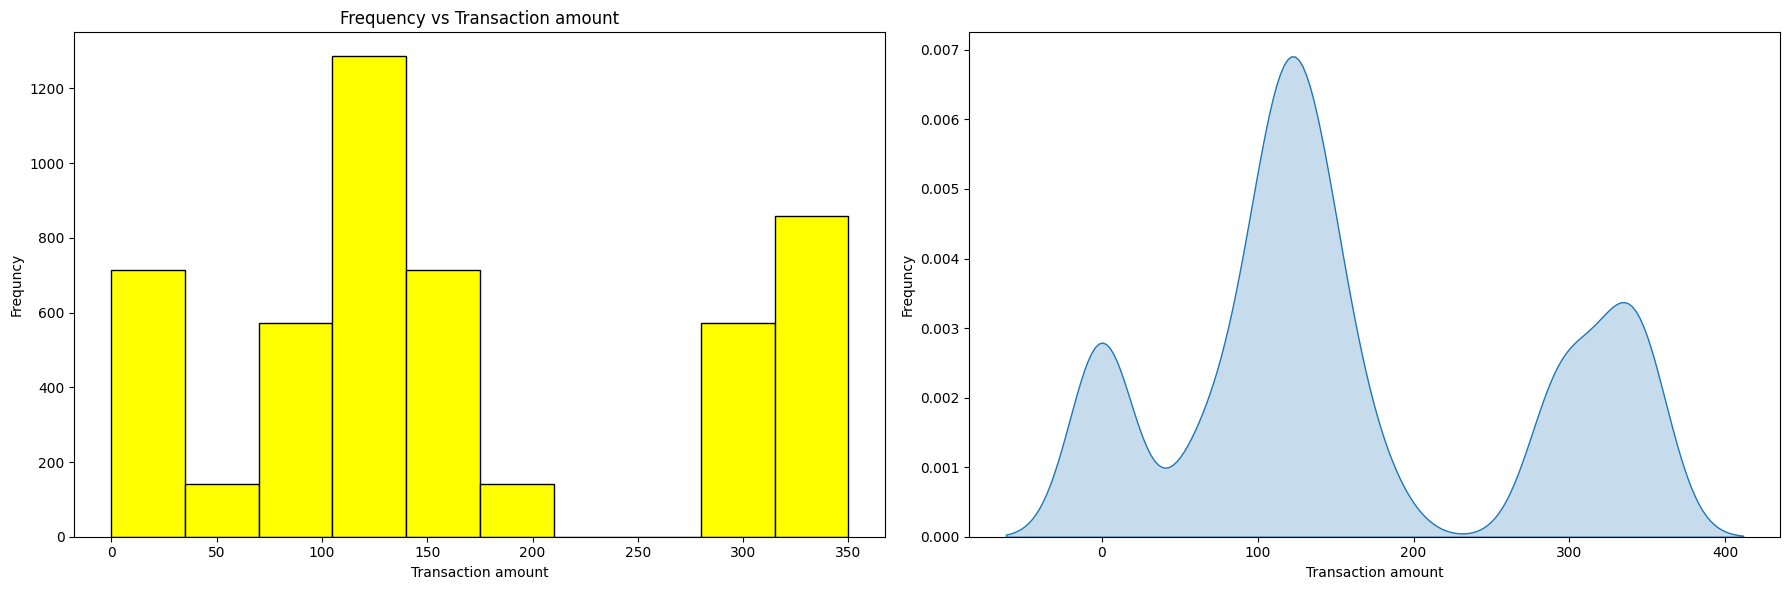

In [ ]:
#Histogram and kde plot of Transaction amount Frequency
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.hist(df['Transaction_Amount'],bins = 10,color='yellow',edgecolor='black')
plt.xlabel('Transaction amount')
plt.ylabel('Frequncy')
plt.title("Frequency vs Transaction amount")

plt.subplot(1,2,2)
sns.kdeplot(df['Transaction_Amount'],fill=True)
plt.xlabel('Transaction amount')
plt.ylabel('Frequncy')

plt.tight_layout()
plt.show()




In [ ]:
df1 = df.copy()
df1 = df1[['TollBoothID','Transaction_Amount']]

In [ ]:
pivot_table = pd.pivot_table(df, values="Transaction_ID", index="Vehicle_Type", columns="TollBoothID", aggfunc="count")
pivot_table

TollBoothID,A-101,B-102,C-103,D-104,D-105,D-106
Vehicle_Type,,,,,,
Bus,4.0,NaN,712.0,NaN,NaN,NaN
Car,710.0,4.0,NaN,NaN,NaN,NaN
Motorcycle,NaN,NaN,NaN,40.0,104.0,570.0
SUV,NaN,714.0,NaN,NaN,NaN,NaN
Sedan,714.0,NaN,NaN,NaN,NaN,NaN
Truck,NaN,NaN,714.0,NaN,NaN,NaN
Van,NaN,714.0,NaN,NaN,NaN,NaN


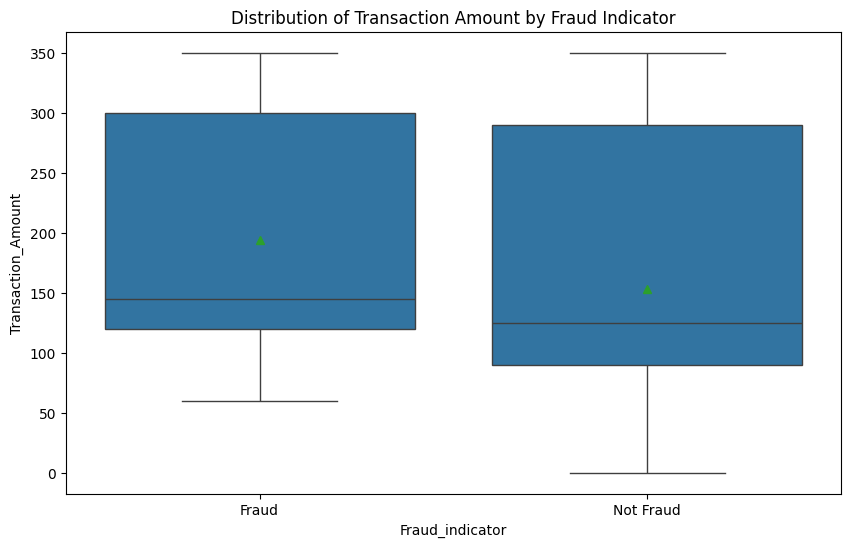

In [ ]:
# Boxplot of transaction amount by fraud indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x="Fraud_indicator", y="Transaction_Amount", showmeans=True, data=df)
plt.title("Distribution of Transaction Amount by Fraud Indicator")
plt.show()

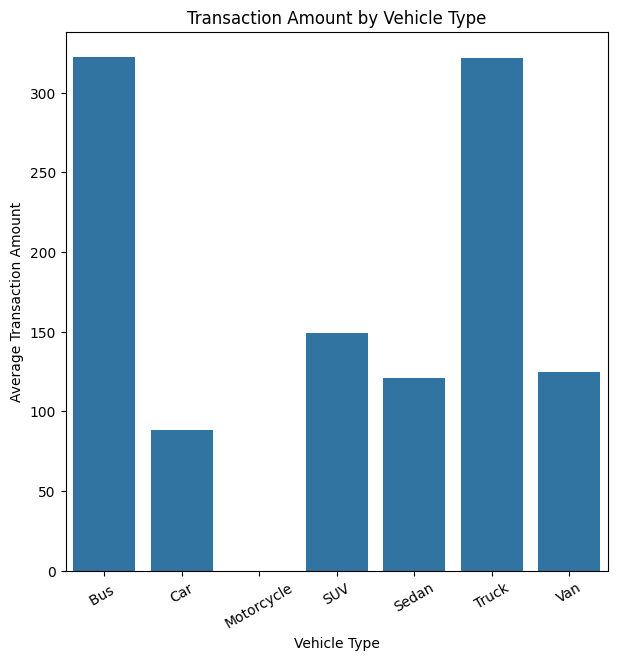

In [ ]:
#Vehicle type Transaction Amount on a Bar plot
vehicle_average_transaction = df.groupby('Vehicle_Type')['Transaction_Amount'].mean().reset_index()

plt.figure(figsize=(7,7))
sns.barplot(x='Vehicle_Type',y='Transaction_Amount',data = vehicle_average_transaction)
plt.xlabel("Vehicle Type")
plt.ylabel("Average Transaction Amount")
plt.title("Transaction Amount by Vehicle Type")
plt.xticks(rotation=30)
plt.show()

### **Transaction amount vs Amount_paid**

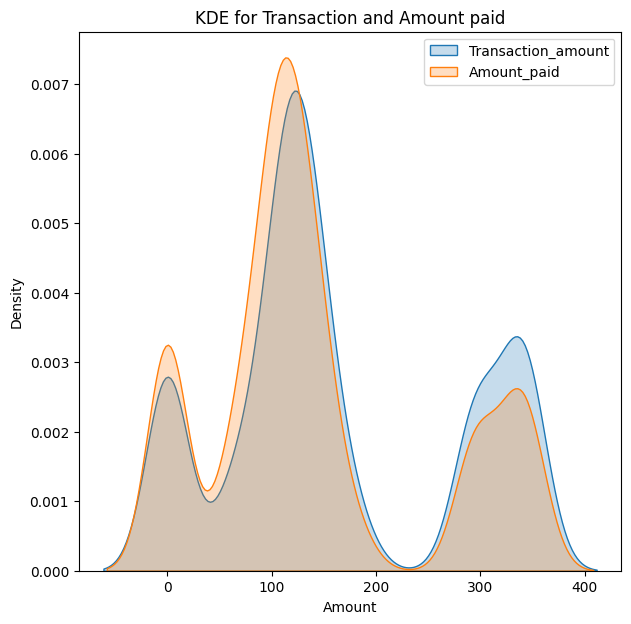

In [ ]:
plt.figure(figsize=(7,7))
sns.kdeplot(data=df['Transaction_Amount'],fill=True,label ='Transaction_amount')
sns.kdeplot(data=df['Amount_paid'],fill= True,label = 'Amount_paid')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title("KDE for Transaction and Amount paid")

plt.legend()
plt.show()



### **Per Hour Fraud Amount**

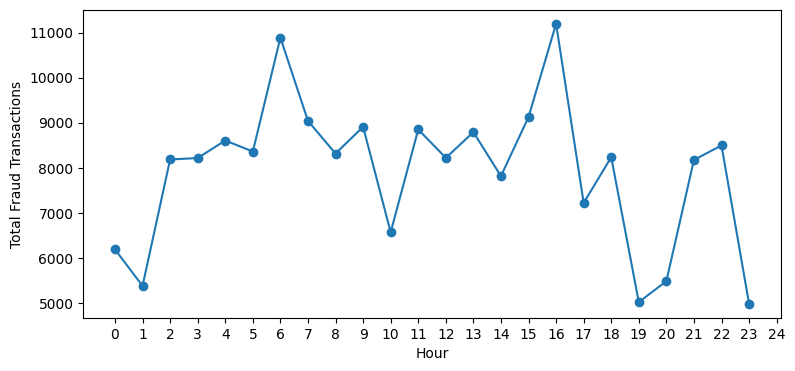

In [ ]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])

df['hour'] = df['Timestamp'].dt.hour

fraud_transactions = df[df['Fraud_indicator']=='Fraud']
fraud_transactions_byhour =  fraud_transactions.groupby('Hour')['Transaction_Amount'].sum()

plt.figure(figsize=(9, 4))
fraud_transactions_byhour.plot(marker='o',linestyle='-')
plt.xlabel("Hour")
plt.ylabel("Total Fraud Transactions")
plt.xticks(range(25))
plt.show()


### **Feature Engineering**

In [ ]:
#selected features- Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Type,Lane_Type

selected_features = df[['Transaction_Amount','Amount_paid','Geographical_Location','Vehicle_Type','Lane_Type']]


In [ ]:
selected_features.Lane_Type.value_counts()

Regular    2858
Express    2142
Name: Lane_Type, dtype: int64

In [ ]:
X =pd.get_dummies(selected_features , columns=['Geographical_Location','Vehicle_Type','Lane_Type'])

In [ ]:
X

,Transaction_Amount,Amount_paid,"Geographical_Location_12.84197701525119, 77.67547528176169","Geographical_Location_12.936687032945434, 77.53113977439017","Geographical_Location_13.042660878688794, 77.47580097259879","Geographical_Location_13.059816123454882, 77.77068662374292","Geographical_Location_13.21331620748757, 77.55413526894684",Vehicle_Type_Bus,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,Lane_Type_Express,Lane_Type_Regular
0,350,120,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,120,100,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,350,120,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,140,100,0,0,0,1,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,330,330,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4996,125,125,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4997,115,115,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4998,145,145,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
y1 = df['Fraud_indicator']

In [ ]:
scaler = StandardScaler()
label = LabelEncoder()

In [ ]:
Xs = scaler.fit_transform(X)
X = pd.DataFrame(Xs,columns=X.columns)
X

,Transaction_Amount,Amount_paid,"Geographical_Location_12.84197701525119, 77.67547528176169","Geographical_Location_12.936687032945434, 77.53113977439017","Geographical_Location_13.042660878688794, 77.47580097259879","Geographical_Location_13.059816123454882, 77.77068662374292","Geographical_Location_13.21331620748757, 77.55413526894684",Vehicle_Type_Bus,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,Lane_Type_Express,Lane_Type_Regular
0,1.680364,-0.199689,-0.5,-0.5,-0.5,2.0,-0.5,2.446066,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,1.155105,-1.155105
1,-0.365195,-0.387535,-0.5,-0.5,-0.5,2.0,-0.5,-0.408820,2.450061,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,-0.865722,0.865722
2,-1.432443,-1.326764,-0.5,-0.5,-0.5,2.0,-0.5,-0.408820,-0.408153,2.450061,-0.408153,-0.408153,-0.408153,-0.408153,-0.865722,0.865722
3,1.680364,-0.199689,-0.5,-0.5,-0.5,2.0,-0.5,-0.408820,-0.408153,-0.408153,-0.408153,-0.408153,2.450061,-0.408153,-0.865722,0.865722
4,-0.187320,-0.387535,-0.5,-0.5,-0.5,2.0,-0.5,-0.408820,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,2.450061,1.155105,-1.155105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.502490,1.772691,-0.5,-0.5,-0.5,-0.5,2.0,-0.408820,-0.408153,-0.408153,-0.408153,-0.408153,2.450061,-0.408153,-0.865722,0.865722
4996,-0.320726,-0.152728,-0.5,-0.5,-0.5,-0.5,2.0,-0.408820,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,2.450061,1.155105,-1.155105
4997,-0.409663,-0.246651,-0.5,-0.5,-0.5,-0.5,2.0,-0.408820,-0.408153,-0.408153,-0.408153,2.450061,-0.408153,-0.408153,-0.865722,0.865722
4998,-0.142851,0.035118,-0.5,-0.5,-0.5,-0.5,2.0,-0.408820,-0.408153,-0.408153,2.450061,-0.408153,-0.408153,-0.408153,1.155105,-1.155105


In [ ]:
y = label.fit_transform(y1)
y


array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
Xtrain,Xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=42)

   Accuracy  Precision  Recall        F1      Confusion Matrix
0     0.999   0.998724     1.0  0.999362  [[216, 1], [0, 783]]


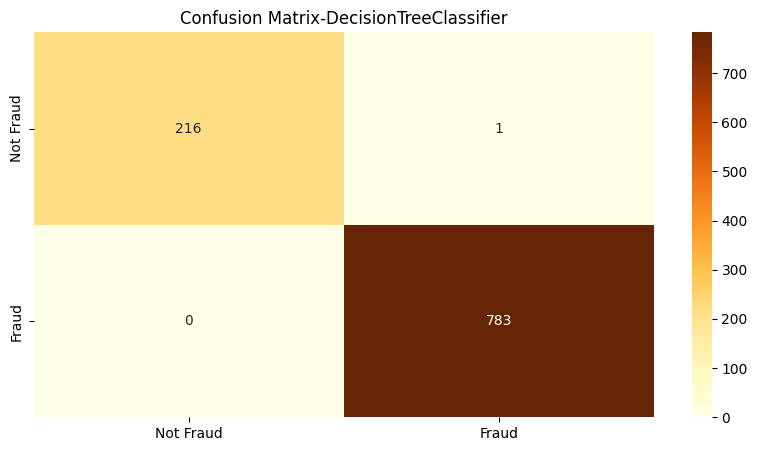

In [ ]:
#Decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain,ytrain)
ypred = dtc.predict(Xtest)
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
confusion = confusion_matrix(ytest, ypred)
Dict1 = {'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1':f1,'Confusion Matrix':[confusion]}
DecisiontreeClassifier = pd.DataFrame(Dict1)
print(DecisiontreeClassifier)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title(f'Confusion Matrix-DecisionTreeClassifier')
plt.show()


   Accuracy  Precision  Recall        F1      Confusion Matrix
0     0.996   0.994917     1.0  0.997452  [[213, 4], [0, 783]]


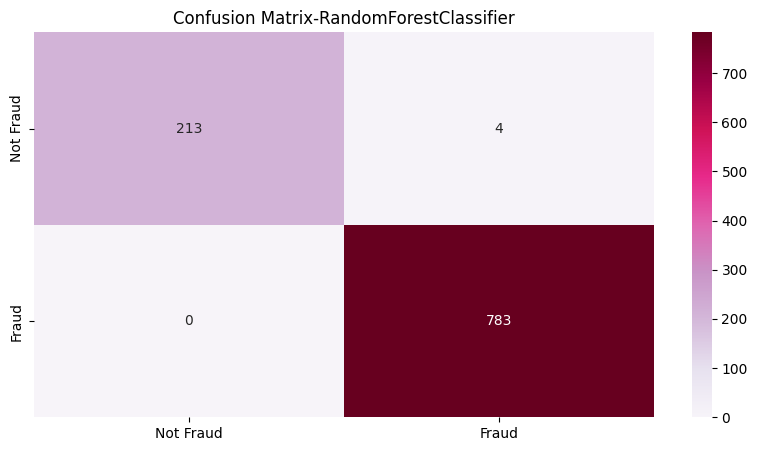

In [ ]:
#Random forest Classifier
rfc = RandomForestClassifier()
rfc.fit(Xtrain,ytrain)
ypred2 = rfc.predict(Xtest)
accuracy2 = accuracy_score(ytest, ypred2)
precision2 = precision_score(ytest, ypred2)
recall2 = recall_score(ytest, ypred2)
f12 = f1_score(ytest, ypred2)
confusion2 = confusion_matrix(ytest, ypred2)
Dict2 = {'Accuracy':accuracy2,'Precision':precision2,'Recall':recall2,'F1':f12,'Confusion Matrix':[confusion2]}
RandomforestClassifier= pd.DataFrame(Dict2)
print(RandomforestClassifier)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion2, annot=True, fmt='d', cmap='PuRd', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title(f'Confusion Matrix-RandomForestClassifier')
plt.show()

   Accuracy  Precision  Recall   F1      Confusion Matrix
0       1.0        1.0     1.0  1.0  [[217, 0], [0, 783]]


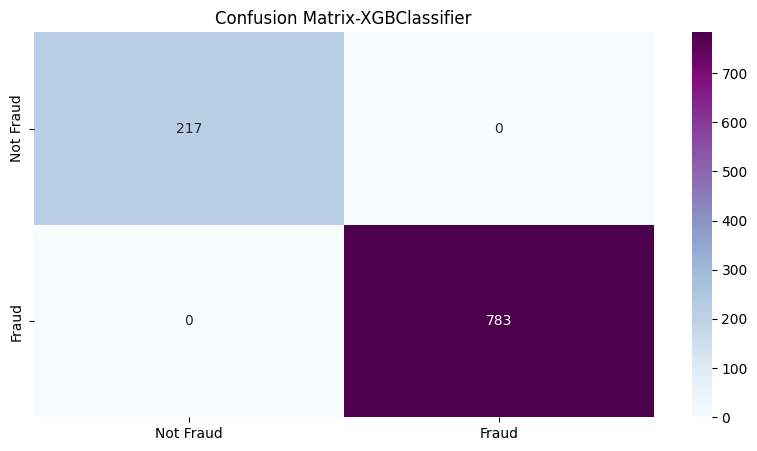

In [ ]:
#XGBoost
xgb = XGBClassifier()
xgb.fit(Xtrain,ytrain)
ypred3 = xgb.predict(Xtest)
accuracy3 = accuracy_score(ytest, ypred3)
precision3 = precision_score(ytest, ypred3)
recall3 = recall_score(ytest, ypred3)
f13 = f1_score(ytest, ypred3)
confusion3 = confusion_matrix(ytest, ypred3)
Dict3 = {'Accuracy':accuracy3,'Precision':precision3,'Recall':recall3,'F1':f13,'Confusion Matrix':[confusion3]}
XGBclassifier= pd.DataFrame(Dict3)
print(XGBclassifier)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion3, annot=True, fmt='d', cmap='BuPu', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title(f'Confusion Matrix-XGBClassifier')
plt.show()

   Accuracy  Precision  Recall        F1       Confusion Matrix
0     0.964   0.956044     1.0  0.977528  [[181, 36], [0, 783]]


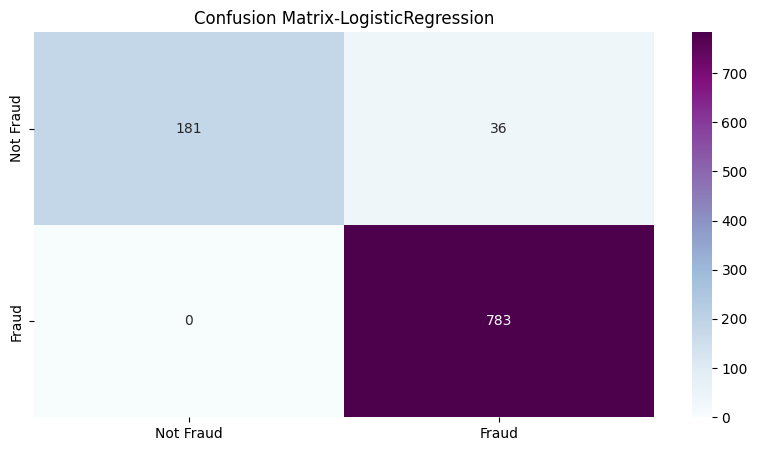

In [ ]:
#Logistic Regression
lr =  LogisticRegression()
lr.fit(Xtrain,ytrain)
ypred4 = lr.predict(Xtest)
accuracy4 = accuracy_score(ytest, ypred4)
precision4 = precision_score(ytest, ypred4)
recall4 = recall_score(ytest, ypred4)
f14 = f1_score(ytest, ypred4)
confusion4 = confusion_matrix(ytest, ypred4)
Dict4 = {'Accuracy':accuracy4,'Precision':precision4,'Recall':recall4,'F1':f14,'Confusion Matrix':[confusion4]}
Logisticregression= pd.DataFrame(Dict4)
print(Logisticregression)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion4, annot=True, fmt='d', cmap='YlGn', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title(f'Confusion Matrix-LogisticRegression')
plt.show()

   Accuracy  Precision  Recall        F1       Confusion Matrix
0     0.938   0.926627     1.0  0.961916  [[155, 62], [0, 783]]


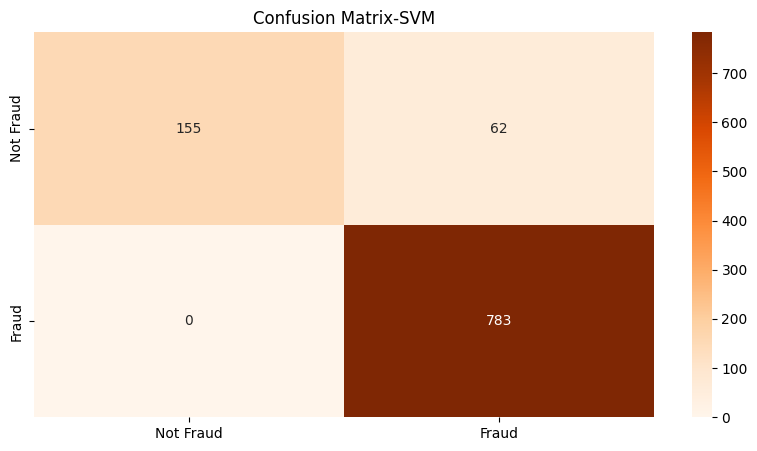

In [ ]:
#SVM  SVC()
sv = SVC()
sv.fit(Xtrain,ytrain)
ypred5 = sv.predict(Xtest)
accuracy5 = accuracy_score(ytest, ypred5)
precision5 = precision_score(ytest, ypred5)
recall5 = recall_score(ytest, ypred5)
f15 = f1_score(ytest, ypred5)
confusion5 = confusion_matrix(ytest, ypred5)
Dict5 = {'Accuracy':accuracy5,'Precision':precision5,'Recall':recall5,'F1':f15,'Confusion Matrix':[confusion5]}
Svc= pd.DataFrame(Dict5)
print(Svc)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion5, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title(f'Confusion Matrix-SVM')
plt.show()


In [ ]:
All_models = pd.DataFrame([Dict1,Dict2,Dict3,Dict4,Dict5],index=['DecisiontreeClassifier','RandomforestClassifier','XGBclassifier','Logisticregression','Svc'])

In [ ]:
All_models

,Accuracy,Precision,Recall,F1,Confusion Matrix
DecisiontreeClassifier,0.999,0.998724,1.0,0.999362,"[[[216, 1], [0, 783]]]"
RandomforestClassifier,0.997,0.996183,1.0,0.998088,"[[[214, 3], [0, 783]]]"
XGBclassifier,1.000,1.000000,1.0,1.000000,"[[[217, 0], [0, 783]]]"
Logisticregression,0.964,0.956044,1.0,0.977528,"[[[181, 36], [0, 783]]]"
Svc,0.938,0.926627,1.0,0.961916,"[[[155, 62], [0, 783]]]"


All the Algorithms are giving same more or less Same Accuracy.